In [1]:
import pandas as pd 
import numpy as np

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
header = ['sepal length in cm' , 'sepal width in cm' , 'petal length in cm' , 'petal width in cm' , 'class']

In [33]:
df = pd.read_csv(url , names = header)
df = df.replace(df['class'].unique() , [0,1,2])

In [35]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## KNN Algorithm
- Calculate the distance between the query example and the current example from the data.
- Add the distance and the index of the example to an ordered collection
- Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
- Pick the first K entries from the sorted collection
- Get the labels of the selected K entries
    - If regression, return the mean of the K labels
    - If classification, return the mode of the K labels

In [36]:
def distance(v1, v2):
    # Eucledian 
    return np.sqrt(((v1-v2)**2).sum())

In [37]:
def knn(X_train, Y_train , test , num ):
    dist = []

    for i in range(X_train.shape[0]):
        # Compute the distance from test point
        d = distance(test, X_train[i])
        dist.append([d, Y_train[i]])
        
    # Sort based on distance 
    dk = sorted(dist, key=lambda x : x[0])
    # Retrieve only the labels
    labels = np.array(dk)[:,-1]
    output = np.zeros(7)
    answer = []
    j = 0
    for k in range(num):
        output[int(labels[k])]+=1
        answer.append( np.argmax(output) )
        
    return answer

In [38]:
X = np.array(df)[: , 0:4]
Y = np.array(df)[: , 4]

In [39]:
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, Y,
                                                    shuffle=True, stratify=Y,
                                                    test_size=0.3, random_state=2)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((105, 4), (45, 4), (105,), (45,))

In [70]:
num = 10
cnt = np.zeros(num)
y_pred_manually = []

for i in range(X_valid.shape[0]):
    answer = knn(X_train , y_train , X_valid[i] ,num)
    y_pred_manually.append(answer[0])
    for j in range(num):
        cnt[j] += answer[j] == y_valid[i]

accuracy = cnt/X_valid.shape[0]

print("Maximum Accuracy :",max(accuracy)*100 ,"%")
print("Value of K :",np.argmax(accuracy)+1)

Maximum Accuracy : 100.0 %
Value of K : 9


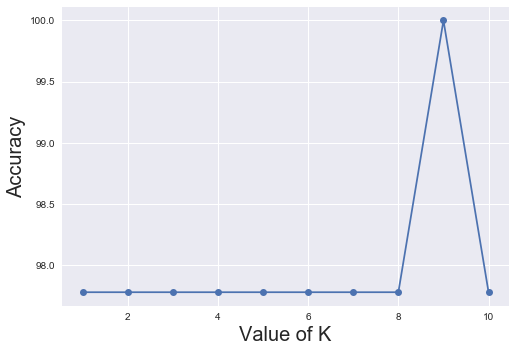

In [71]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(list(range(1,11)) , accuracy*100 , marker= 'o')
plt.xlabel("Value of K",fontsize = 20)
plt.ylabel("Accuracy",fontsize = 20)
plt.show()